# Plot ground motion fields

In [21]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

from oq_parse_gmfs import plot_df, plot_stations


# Select gmfs for available calculations

In [22]:
# Event name
event = '19921012_M5.9_Cairo'

# Specify calculation ids. None for all log files in event folder
# For specific calculations, indicate them in a list e.g., 
# calcs = [1, 2, 3]
calcs = None

In [23]:
# Select log files for OQ calculations
if not calcs:
    gmf_files = sorted(glob.glob(os.path.join('..', '*', event, 'OpenQuake_gmfs',
                               'Sensitivity', 'gmf_median_PGA_*.csv')))
else:
    gmf_files = []
    for calc in calcs:
        gmf_files.append(glob.glob(os.path.join('..', '*', event, 'OpenQuake_gmfs',
                               'Sensitivity', f'gmf_median_PGA_{calc}.csv'))[0])
assert len(gmf_files)!=0, 'No log files to parse'

# Get folders
sens_folder = os.path.dirname(gmf_files[0])
folder = os.path.dirname(sens_folder)
maps_folder = os.path.join(folder, '.maps')

# Save images in temporary file .maps
if not os.path.isdir(maps_folder):
    os.mkdir(maps_folder)

gmf_files

['../Egypt/19921012_M5.9_Cairo/OpenQuake_gmfs/Sensitivity/gmf_median_PGA_512.csv',
 '../Egypt/19921012_M5.9_Cairo/OpenQuake_gmfs/Sensitivity/gmf_median_PGA_513.csv',
 '../Egypt/19921012_M5.9_Cairo/OpenQuake_gmfs/Sensitivity/gmf_median_PGA_514.csv',
 '../Egypt/19921012_M5.9_Cairo/OpenQuake_gmfs/Sensitivity/gmf_median_PGA_515.csv']

Saving gmfs figures from 4 calculations in folder:
   ../Egypt/19921012_M5.9_Cairo/OpenQuake_gmfs/.maps
   calc_id: 512: # 19921012_M5.9_Cairo median gmf, Stations:None, gmlt:GEM, Rupture:USGS
   calc_id: 513: # 19921012_M5.9_Cairo median gmf, Stations:None, gmlt:USGS, Rupture:USGS
   calc_id: 514: # 19921012_M5.9_Cairo median gmf, Stations:Seismic, gmlt:GEM, Rupture:USGS
   calc_id: 515: # 19921012_M5.9_Cairo median gmf, Stations:Seismic, gmlt:USGS, Rupture:USGS


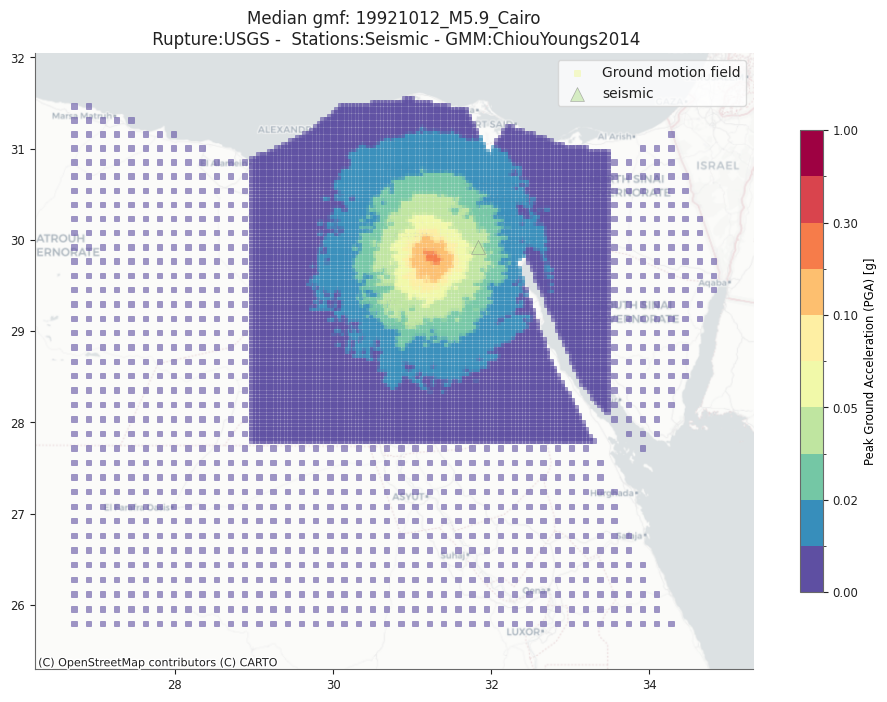

In [24]:
print(f'Saving gmfs figures from {len(gmf_files)} calculations in folder:\n   {maps_folder}')

for gmf in gmf_files:
    '''
    The gmfs are stored as ['custom_site_id', 'lon', 'lat', 'gmpe1', 'gmpe2', ...]
    '''
    
    # Get calculation description
    with open(gmf, 'r') as f:
        description = f.readline().strip('\n')

    # Get calculation params
    stations, gmlt, rupture = description.split(',')[1:]
    calc_id = int(gmf.split('_')[-1][:-4])
    print(f'   calc_id: {calc_id}: {description}')

    # Read gmfs
    df = pd.read_csv(gmf, comment='#')

    # Create a figure for each GMPE
    cols = ['custom_site_id', 'lon', 'lat']
    gmpes = df.drop(columns=cols).columns.values.tolist()
    for gmpe in gmpes:
        fig, ax = plot_df(df, column=gmpe, pad=0.5,
                          alpha=0.6,
                          marker='s', 
                          markersize=15,
                          edgecolor=None, 
                          linewidth=0.5,
                          label='Ground motion field',
                          legend=True,
                          legend_kwds={'label': 
                                       'Peak Ground Acceleration (PGA) [g]', 
                                       'shrink':0.75},
                          )

        # Add recording stations
        fig, ax = plot_stations(fig, ax, folder, description)

        # Title and file_name
        calc_details = f'{rupture} - {stations} - GMM:{gmpe}'
        map_title = f'''Median gmf: {event.replace('DRAFT_', '')}\n{calc_details}'''
        file_name = f'''gmf_{rupture[9:]}_{gmpe}_{stations[10:]}.png'''

        ax.set_title(map_title, fontsize=12)
        file_path = os.path.join(maps_folder, file_name)

        # Adjust the extents of the plot (uncomments lines and adjust limits):
        # ax.set_xlim(0, 100)
        # ax.set_ylim(-50, 50)
        # plt.axis(‘equal’)


        # Save figure
        fig.savefig(file_path, facecolor="w", 
                    dpi=100, bbox_inches='tight')
        plt.close()
fig

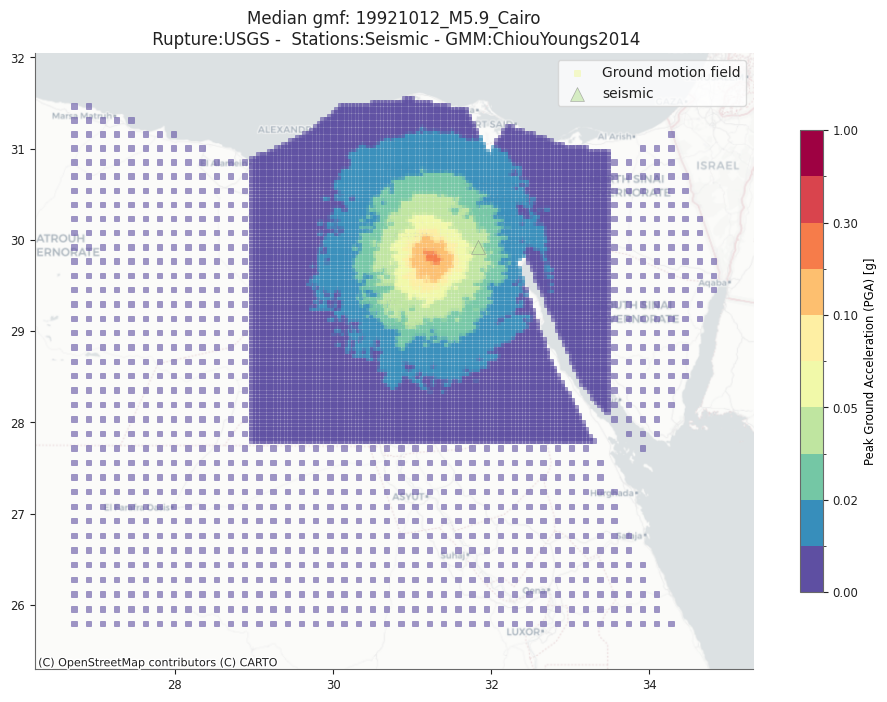

In [25]:


fig